In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from scipy.stats import shapiro

In [2]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv"
df = pd.read_csv(url)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df["BloodPressure"].value_counts()

,count
BloodPressure,
70,57
74,52
78,45
68,45
72,44
64,43
80,40
76,39
60,37


In [5]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [6]:
def percentage_nulls(df):
    """
    This function returns a dictionary with the column and
    the porcentage of missing values
    """
    N_rows = df.shape[0]
    vars_ = {}
    for var in df.columns:
        vars_[var]=(df[var].isnull().sum() / N_rows)
    return vars_

In [7]:
percentage_nulls(df)

{'Pregnancies': np.float64(0.0),
 'Glucose': np.float64(0.0),
 'BloodPressure': np.float64(0.0),
 'SkinThickness': np.float64(0.0),
 'Insulin': np.float64(0.0),
 'BMI': np.float64(0.0),
 'DiabetesPedigreeFunction': np.float64(0.0),
 'Age': np.float64(0.0),
 'Outcome': np.float64(0.0)}

In [8]:
df=df.drop_duplicates().reset_index(drop = True) #eliminar duplicados

In [9]:
df.columns[np.array(df.dtypes == "object")] #the non numeric columns es poco util porque no hay categoricas

Index([], dtype='object')

In [10]:
def binary(data):
  bin_reg = bin_reg = r"^[01](?:\.0)?\.?$"
  if str(data) == 'nan':
    return np.nan
  else:
    return bool(re.findall(bin_reg, str(data)))

def is_binary(df_, col):
  """
  to consider this as a pure binary var take into account that
  the others not reach a limit of range..
  #no puedehaber un porcentaje de varriable superior con más de un  digito!!!!!!
  """
  df = df_.copy()
  percent =  df[col].apply(binary).sum() / df[col].count()
  if percent > 0.5:
    return True
  else:
    return False

normal  = []
nonormal = []
binaries = []
cates = []

def tipo_var(df_):
  df = df_.copy()
  for col in df.columns:
    if df[col].dtypes.name=='int64' or df[col].dtypes.name == 'float64':
      if is_binary(df, col):
        binaries.append(col)
      else:
        if shapiro(df[col]).pvalue > 0.05:
          normal.append(col)
        else:
          nonormal.append(col)
    else:
      cates.append(col)
  return normal, nonormal, binaries,  cates

In [11]:
tipo_var(df) #el primero esta vacio es normales
#el segundo es no normales son varias aqui
#el tercero es binaria (target)
#el ultimo son categoricas (aqui vacio)

([],
 ['Pregnancies',
  'Glucose',
  'BloodPressure',
  'SkinThickness',
  'Insulin',
  'BMI',
  'DiabetesPedigreeFunction',
  'Age'],
 ['Outcome'],
 [])

In [12]:
df['Outcome'].value_counts() #cuando hay que tomar accion y balancera datos?

,count
Outcome,
0,500
1,268


In [13]:
# Regex para seleccionar columnas numéricas
numerical_columns = [col for col in df.columns if re.match(r'^[A-Za-z]+$', col) and col != 'Outcome'] #quito manualmente Target
df[numerical_columns].describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [14]:
!pip install tableone


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 1.8 MB/s eta 0:00:00


In [15]:
#matriz de correlacion
corr = df.corr(numeric_only=True) #importante si hay categoricos que este activo el parentesis
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

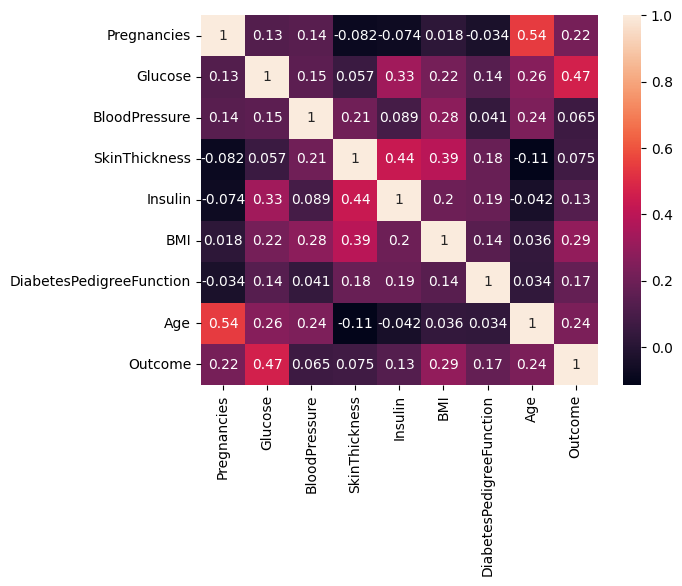

In [16]:
sns.heatmap(corr, annot=True)

In [17]:
from tableone import TableOne

# Definir las columnas numéricas y categóricas (para numericas podria haber usado numerical_columns como ya estaba definida)
columns = df.columns.drop('Outcome').tolist()
categorical = []  # si tuviera variables categóricas van aquí

# Crear TableOne
table1 = TableOne(data=df, nonnormal=nonormal, categorical=categorical, groupby='Outcome', pval=True, htest_name=True) #divido entre con y sin diabetes

table1


Grouped by Outcome                                                                                     
                                                     Missing             Overall                   0                    1 P-Value            Test
n                                                                            768                 500                  268                        
Pregnancies, median [Q1,Q3]                                0       3.0 [1.0,6.0]       2.0 [1.0,5.0]        4.0 [1.8,8.0]  <0.001  Kruskal-Wallis
Glucose, median [Q1,Q3]                                    0  117.0 [99.0,140.2]  107.0 [93.0,125.0]  140.0 [119.0,167.0]  <0.001  Kruskal-Wallis
BloodPressure, median [Q1,Q3]                              0    72.0 [62.0,80.0]    70.0 [62.0,78.0]     74.0 [66.0,82.0]  <0.001  Kruskal-Wallis
SkinThickness, median [Q1,Q3]                              0     23.0 [0.0,32.0]     21.0 [0.0,31.0]      27.0 [0.0,36.0]   0.013  Kruskal-Wallis
Insulin, median [Q1,Q3]                                    0    30.5 [0.0,127.2]    39.0 [0.0,105.0]      0.0 [0.0,167.2]   0.066  Kruskal-Wallis
BMI, median [Q1,Q3]                                        0    32.0 [27.3,36.6]    30.1 [25.4,35.3]     34.2 [30.8,38.8]  <0.001  Kruskal-Wallis
DiabetesPedigreeFunction, median [Q1,Q3]                   0       0.4 [0.2,0.6]       0.3 [0.2,0.6]        0.4 [0.3,0.7]  <0.001  Kruskal-Wallis
Age, median [Q1,Q3]                                        0    29.0 [24.0,41.0]    27.0 [23.0,37.0]     36.0 [28.0,44.0]  <0.001  Kruskal-Wallis

In [18]:
#Separar el dataset en train y test
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# 2. Dividir en train/test antes de escalar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 3. Escalar solo usando la media y std de X_train
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # transform SOLO (sin fit)

In [19]:
#algoritmo para arboles de decision

def grid_dt(X_train, y_train):
    model = DecisionTreeClassifier(random_state=666)

    class_weight = [{0:0.05, 1:0.95}, {0:0.1, 1:0.9}, {0:0.2, 1:0.8}]
    max_depth = [None, 3, 5, 10] #cuidado si uso solo none es una tupla de un solo valor, no una lista o un valor único. agrego 3, 5, 10
    min_samples_leaf = [5, 10, 20, 50, 100]
    criterion  = ["gini", "entropy"]

    grid = dict(
        class_weight=class_weight,
        max_depth=max_depth,
        min_samples_leaf=min_samples_leaf,
        criterion=criterion
    )

    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

    grid_search = GridSearchCV(
        estimator=model,
        param_grid=grid,
        n_jobs=-1,
        cv=cv,
        scoring='f1',
        error_score=0,
        verbose=1
    )

    grid_result = grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_


In [20]:
#entreno modelo arbol de decision
best_dt = grid_dt(X_train_scaled, y_train)
y_pred_dt = best_dt.predict(X_test_scaled)

print(classification_report(y_test, y_pred_dt))


Fitting 15 folds for each of 120 candidates, totalling 1800 fits
              precision    recall  f1-score   support

           0       0.90      0.52      0.66       100
           1       0.50      0.89      0.64        54

    accuracy                           0.65       154
   macro avg       0.70      0.70      0.65       154
weighted avg       0.76      0.65      0.65       154



In [21]:
#Ahora voy a comparar con regresion logistca
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

def grid_search_lr(X_train, y_train):
    model = LogisticRegression(random_state=666, max_iter=1000)

    class_weight = [{0:0.05, 1:0.95}, {0:0.1, 1:0.9}, {0:0.2, 1:0.8}]
    solvers = ['liblinear']
    penalty = ['l1', 'l2']
    c_values = [10, 1.0, 0.1, 0.01, 0.001]

    grid = dict(
        solver=solvers,
        penalty=penalty,
        C=c_values,
        class_weight=class_weight
    )

    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

    grid_search = GridSearchCV(
        estimator=model,
        param_grid=grid,
        n_jobs=-1,
        cv=cv,
        scoring='f1',
        error_score=0,
        verbose=1
    )

    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    print("Mejores hiperparámetros:", best_params)
    return best_model


In [22]:
#entreno modelo de regresion logistca
best_lr = grid_search_lr(X_train_scaled, y_train)
y_pred_lr = best_lr.predict(X_test_scaled)

print(classification_report(y_test, y_pred_lr))


Fitting 15 folds for each of 30 candidates, totalling 450 fits
Mejores hiperparámetros: {'C': 0.1, 'class_weight': {0: 0.2, 1: 0.8}, 'penalty': 'l2', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.91      0.58      0.71       100
           1       0.53      0.89      0.67        54

    accuracy                           0.69       154
   macro avg       0.72      0.73      0.69       154
weighted avg       0.78      0.69      0.69       154



In [23]:
#ahora voy a comparar con un modelo de redes neuronales

def grid_search_mlp(X_train, y_train):
    model = MLPClassifier(max_iter=1000, random_state=666)

    hidden_layer_sizes = [(10,), (20,), (20, 10)]
    activation = ['relu', 'tanh']
    alpha = [0.0001, 0.001, 0.01]
    learning_rate_init = [0.001, 0.01]
    solver = ['adam']  # 'adam' suele ser más estable que 'sgd' sin mucha parametrización

    param_grid = dict(
        hidden_layer_sizes=hidden_layer_sizes,
        activation=activation,
        alpha=alpha,
        learning_rate_init=learning_rate_init,
        solver=solver
    )

    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)

    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring='f1',
        n_jobs=-1,
        cv=cv,
        error_score=0,
        verbose=1
    )

    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    print("Mejores hiperparámetros:", grid_search.best_params_)
    return best_model


In [ ]:
#entreno modelo redes neuronales
best_mlp = grid_search_mlp(X_train_scaled, y_train)
y_pred_mlp = best_mlp.predict(X_test_scaled)

print(classification_report(y_test, y_pred_mlp))


Fitting 10 folds for each of 36 candidates, totalling 360 fits


In [ ]:
! pip install imbalanced-learn > null

In [ ]:
# Undersampling si el ratio es mayor a 1:5
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=1234)
X_res, y_res = rus.fit_resample(X, y)
X_res, y_res = rus.fit_resample(X, y)

In [ ]:
def classification_report_to_df(y_true, y_pred):
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    df_report = pd.DataFrame(report_dict).transpose()
    df_report = df_report.drop(index=['accuracy', 'macro avg', 'weighted avg'])  # Opcional
    return df_report

In [ ]:
#grafico comparativo de metricas de los clasificadores
reportmlp = classification_report(y_test, y_pred_mlp, output_dict=True)
reportlr = classification_report(y_test, y_pred_lr, output_dict=True)
reportdt = classification_report(y_test, y_pred_dt, output_dict=True)

In [ ]:
[[reportdt['0']['f1-score'],reportdt['1']['f1-score'],reportdt['accuracy']],
   [reportlr['0']['f1-score'],reportlr['1']['f1-score'],reportlr['accuracy']],
   [reportmlp['0']['f1-score'],reportmlp['1']['f1-score'],reportmlp['accuracy']]]

In [ ]:
report_val=np.transpose([[reportdt['0']['f1-score'],reportdt['1']['f1-score'],reportdt['accuracy']],
   [reportlr['0']['f1-score'],reportlr['1']['f1-score'],reportlr['accuracy']],
   [reportmlp['0']['f1-score'],reportmlp['1']['f1-score'],reportmlp['accuracy']]])
report_val

In [ ]:
classificador = ("MLP", "logistric reg", "decision tree")
classification_metrics = {
    '0 - f1score': report_val[0],
    '1 - f1score': report_val[1],
    'accuracy': report_val[2],
}

x = np.arange(len(classificador))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in classification_metrics.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('classification metrics by model')
ax.set_xticks(x + width, classificador)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0,1)

plt.show()

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
def grid_RandomForest(X_train, y_train):
  model = RandomForestClassifier(random_state=0)
  n_estimators = [280,250,290]
  criterion = ['gini', 'entropy', 'log_loss']
  min_samples_split = [0.12, 0.1, 0.2]
  max_depth = [10,12,15]
  grid = dict(n_estimators = n_estimators, criterion = criterion,
              min_samples_split = min_samples_split, max_depth = max_depth)
  cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)
  grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv,
                            scoring='roc_auc',error_score='raise')
  grid_result = grid_search.fit(X_train, y_train)
  return  grid_result.best_estimator_

def grid_Adaboost(X_train, y_train):
    model = AdaBoostClassifier(random_state=1)
    n_estimators = [2, 15, 35, 50, 70, 100]
    learning_rate = np.linspace(0.01, 1, 10)
    grid = dict(n_estimators=n_estimators, learning_rate=learning_rate)
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)
    grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv,
                               scoring='roc_auc', error_score='raise')
    grid_result = grid_search.fit(X_train, y_train)
    return grid_result.best_estimator_

In [ ]:
gridmodelrf = grid_RandomForest(X_train,y_train)
y_pred_rf = gridmodelrf.predict(X_test)
reportrf = classification_report(y_test,y_pred_rf)

In [ ]:
gridmodelrf

In [ ]:
print(reportrf)

In [ ]:
gridmodelab = grid_Adaboost(X_train,y_train)
y_pred_ab = gridmodelab.predict(X_test)
reportab = classification_report(y_test,y_pred_ab)

In [ ]:
print(reportab)